In [117]:
import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, Flatten,Dropout,MaxPooling2D, Activation
from keras.layers import Reshape, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [118]:
path= '../datasets/cifar-10-batches-py/'

In [129]:
ims = os.listdir(path)
batches=[]
print ims
for ix in range(len(ims)):
    if 'data_batch' in ims[ix]:
        batches.append(unpickle(path+ims[ix]))
print batches[0].keys()

['.floyddata', 'batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'readme.html', 'test_batch']
['data', 'labels', 'batch_label', 'filenames']


In [3]:
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [149]:
imgs=[]
labels=[]
#imgs= batches[0]['data'].reshape((len(batches[0]['data']), 3, 32, 32)).transpose(0, 2, 3, 1)

for ix in range(len(batches)):
    for iy in range(len(batches[ix]['data'])):
        imgs.append(batches[ix]['data'][iy].reshape(3, 32, 32).transpose(1, 2, 0))
        labels.append(batches[ix]['labels'][iy])
imgs=np.array(imgs)
labels=np.array(labels)
print labels.shape
print imgs.shape

(50000,)
(50000, 32, 32, 3)


In [156]:
y_data=[]
for ix in range(imgs.shape[0]):
    y_data.append(cv2.cvtColor(imgs[ix], cv2.COLOR_RGB2GRAY).reshape((32, 32, 1)))
y_data=np.array(y_data)
print y_data.shape

(50000, 32, 32, 1)


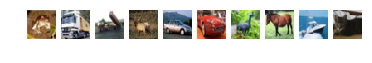

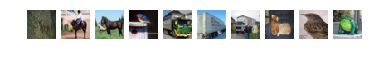

In [152]:
for ix in range(20):
    plt.figure(ix/10)
    plt.subplot(1,10,(ix%10)+1)
    plt.imshow(imgs[ix])
    plt.axis('off')

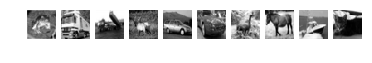

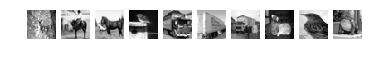

In [159]:
for ix in range(20):
    plt.figure(ix/10)
    plt.subplot(1,10,(ix%10)+1)
    plt.imshow(y_data[ix].reshape(32,32),cmap='gray')
    plt.axis('off')

In [165]:
X_data=[]
y=[]
for ix in range(len(labels)):
    if(labels[ix]==7):
        X_data.append(imgs[ix])
        y.append(y_data[ix])
X_data=np.array(X_data)
y=np.array(y)
print X_data.shape, y.shape

(5000, 32, 32, 3) (5000, 32, 32, 1)


In [167]:
split=int(0.85*X_data.shape[0])
X_train= X_data[:split,:]/255.0
y_train= y[:split]/255.0
X_test=X_data[split:,:]/255.0
y_test= y[split:]/255.0
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(4250, 32, 32, 3) (750, 32, 32, 3)
(4250, 32, 32, 1) (750, 32, 32, 1)


In [168]:
model = Sequential()

model.add(Convolution2D(64, 3, 3, input_shape=(32, 32, 1), activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 5, 5, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))

# Decode
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Convolution2D(64, 5, 5, border_mode='same', activation='relu'))

model.add(UpSampling2D(size=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(3, 3, 3, border_mode='same', activation='relu'))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_98 (Convolution2D) (None, 30, 30, 64)    640         convolution2d_input_14[0][0]     
____________________________________________________________________________________________________
convolution2d_99 (Convolution2D) (None, 28, 28, 128)   73856       convolution2d_98[0][0]           
____________________________________________________________________________________________________
maxpoo

In [ ]:
hist = model.fit(y_train,X_train,
                      nb_epoch=5,
                      shuffle=True,
                      batch_size=100,
                      validation_data=(y_test,X_test))

Train on 4250 samples, validate on 750 samples
Epoch 1/5
4250/4250 [==============================] - 69s - loss: 0.0972 - acc: 0.4396 - val_loss: 0.0457 - val_acc: 0.5011

In [170]:
out = model.predict(y_train[:100])
print out.shape

(100, 32, 32, 3)


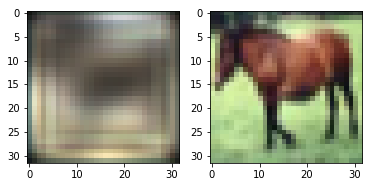

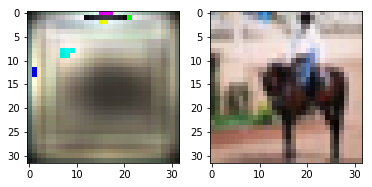

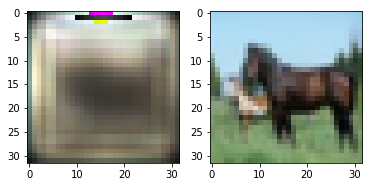

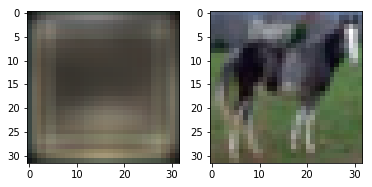

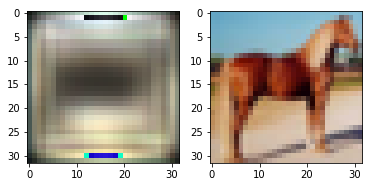

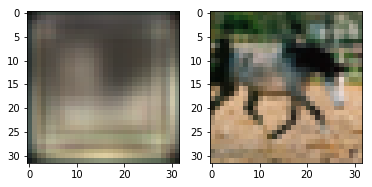

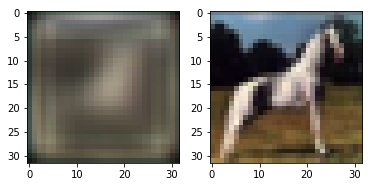

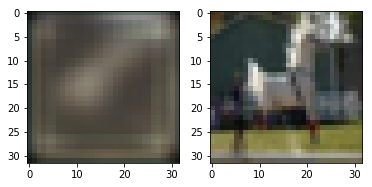

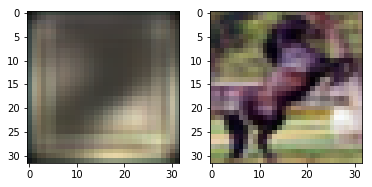

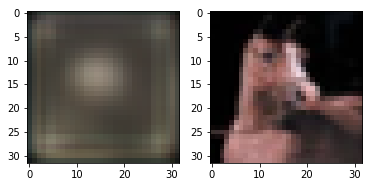

In [173]:
for ix in range(10):
    plt.figure(ix)
    plt.subplot(1, 2, 1)
    plt.imshow(out[ix])
    plt.subplot(1, 2, 2)
    plt.imshow(X_data[ix])
plt.show()

In [174]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1), activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 5, 5, activation='relu'))
model.add(Convolution2D(8, 3, 3, activation='relu'))

# Decode
model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(16, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(2, 2)))
model.add(Convolution2D(32, 5, 5, border_mode='same', activation='relu'))

model.add(UpSampling2D(size=(2, 2)))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))

model.add(ZeroPadding2D(padding=(1, 1)))
model.add(Convolution2D(3, 3, 3, border_mode='same', activation='relu'))

model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
(Subtensor{int64}.0, Elemwise{add,no_inplace}.0, Elemwise{add,no_inplace}.0, Subtensor{int64}.0)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_106 (Convolution2D (None, 30, 30, 32)    320         convolution2d_input_15[0][0]     
____________________________________________________________________________________________________
convolution2d_107 (Convolution2D (None, 28, 28, 64)    18496       convolution2d_106[0][0]          
____________________________________________________________________________________________________
maxpoo

In [ ]:
for ix in range(10):
    plt.figure(ix)
    plt.subplot(1, 2, 1)
    plt.imshow(out[ix])
    plt.subplot(1, 2, 2)
    plt.imshow(X_data[ix])
plt.show()